In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hr_analytics.csv to hr_analytics.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('hr_analytics.csv')

In [ ]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

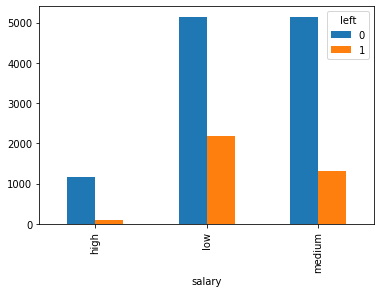

In [ ]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

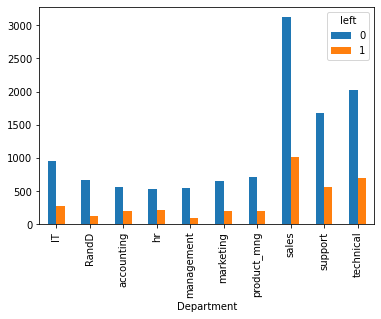

In [ ]:

pd.crosstab(df['Department'],df['left']).plot(kind='bar')


In [ ]:
df1 = df.drop(df[['Work_accident','promotion_last_5years','Department','salary']],axis = 'columns')
df1

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  left  
0                       157                   3     1  
1                       262                   6     1  
2                       272                   4     1  
3                       223                   5     1  
4                       159                   3     1  
...                     ...                 ...   ...  
14994                   151                   3     1  
14995                   160                   3     1  
14996                   143                   3     1  
14997                   280                   4     1  
14998                   158                   3     1  

[14999 rows x 6 columns]

In [ ]:
dummies= pd.get_dummies(df.salary)
df2 = pd.concat([df1,dummies],axis='columns')
df3 = df2.drop(df2[['medium']],axis='columns')
df3

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  left  high  low  
0                       157                   3     1     0    1  
1                       262                   6     1     0    0  
2                       272                   4     1     0    0  
3                       223                   5     1     0    1  
4                       159                   3     1     0    1  
...                     ...                 ...   ...   ...  ...  
14994                   151                   3     1     0    1  
14995                   160                   3     1     0    1  
14996                   143                   3     1     0    1  
14997                   280                   4     1     0    1  
14998                   158                   3     1     0    1  

[14999 rows x 8 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x,train_y,test_x,test_y = train_test_split(df3[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','high','low']],df.left,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [ ]:
model.fit(train_x,test_x)

LogisticRegression()

In [ ]:
model.score(train_x,test_x)

0.7702638346509192

In [ ]:
test_y

8481     0
3089     0
6186     0
10645    0
4057     0
        ..
11169    0
2306     0
11065    0
5786     0
4072     0
Name: left, Length: 4500, dtype: int64

In [ ]:
model.predict(train_y)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
test_y

8481     0
3089     0
6186     0
10645    0
4057     0
        ..
11169    0
2306     0
11065    0
5786     0
4072     0
Name: left, Length: 4500, dtype: int64